# SVD dekompozicija i kompresija

Sledeći primer ilustruje na koji način se menja izgled slike ukoliko se u njenoj SVD dekompoziciji redukuju dimenzije. Primetićemo da žrtvujemo jedan deo kvaliteta slike zarad manjih dimenzija matrica sa kojima se može efikasnije manipulisati.  

In [1]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt

In [2]:
from PIL import Image

Najpre ćemo učitati sliku.

In [3]:
image_tiger = Image.open('assets/tiger.jpg')

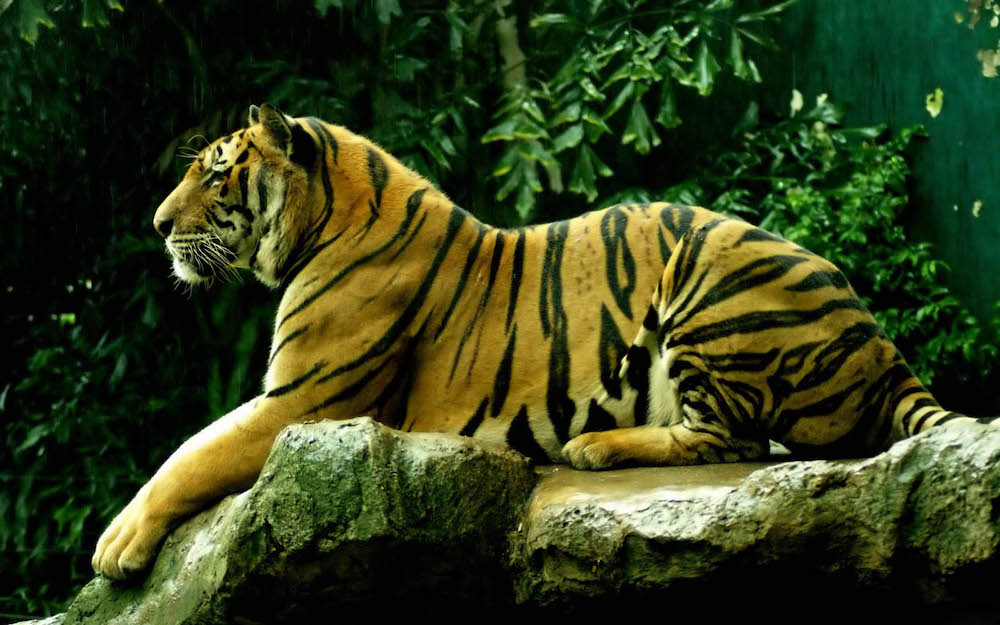

In [4]:
image_tiger

Zatim ćemo sliku pretvoriti u monohromatsku. 

In [5]:
image_tiger_mono = image_tiger.convert('L')

Ovako dobijenu sliku ćemo zbog obrade sačuvati kao matricu.

In [6]:
image = np.array(image_tiger_mono)

Slika je (primetili smo već) velikih dimenzija. 

In [7]:
image.shape

(625, 1000)

Izvršimo sada SVD dekompoziciju matrice slike.

In [8]:
U, S, VT = LA.svd(image)

In [9]:
U.shape, S.shape, VT.shape

((625, 625), (625,), (1000, 1000))

Niz $S$ sadrži redom vrednosti elemenata dijagonalne matrice u SVD dekompoziciji počev od gornjeg levog i sastoji od opadajućih pozitivnih vrednosti. 

Matrica ima 625 signularnih vrednosti jer su svi unosi u $S$ različiti od nule.

In [10]:
np.count_nonzero(S)

625

Uverimo se i da su elementi niza $S$ uređeni opadajuće.

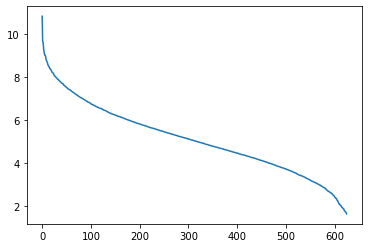

In [11]:
# ovde je pogodnije koristiti logaritamsku skalu
plt.plot(np.log(S))
plt.show()

Odsecanjem manjih sigularnih vrednosti iz $S$ vršimo aproksimaciju polazne matrice do na određenu preciznost. Napišimo funkciju koja na osnovu parametra $k$ vrši aproksimaciju tako što pamti prvih $k$ singularnih vrednosti. Uz redukovanje dimenzija niza $S$, smanjuje se i broj kolona matrice $U$ i broj redova matrice $VT$.

In [12]:
def approximate(image, k, save_image=False):
    U, S, VT = LA.svd(image)
    
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    
    new_image = np.dot(np.dot(Uk, Sk), VTk)
    
    new_image = Image.fromarray(new_image).convert('L')
    
    if save_image: 
        new_image.save('./compression/tiger_{0}.jpg'.format(k))
    else:
        return new_image

Pogledajmo rezultate nekih apromksimacija.

In [13]:
image_500 = approximate(image, 500, False)

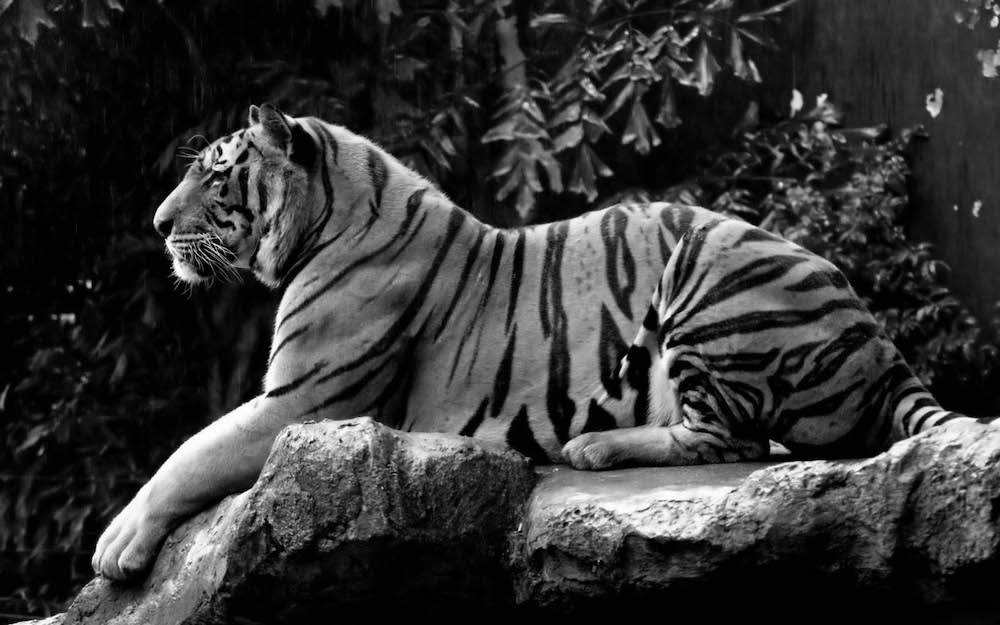

In [14]:
image_500

In [15]:
image_300 = approximate(image, 300, False)

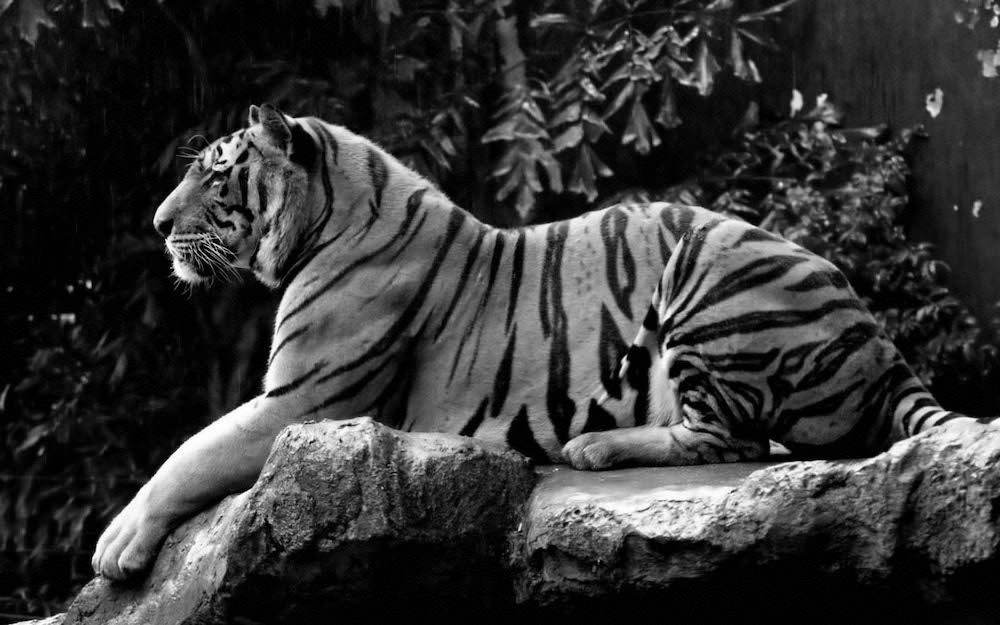

In [16]:
image_300

In [17]:
image_100 = approximate(image, 100, False)

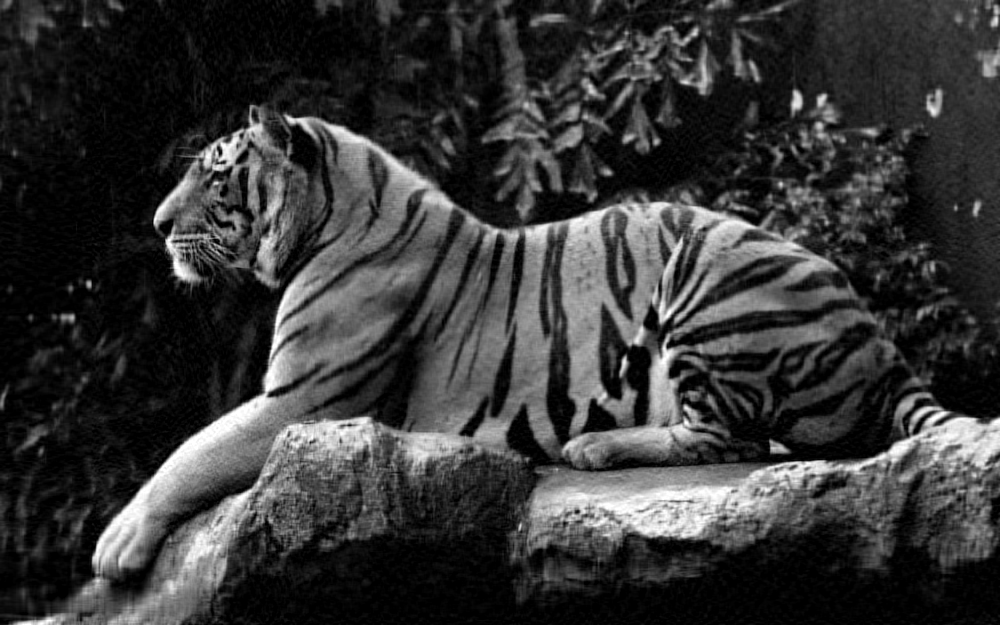

In [18]:
image_100

In [19]:
image_50 = approximate(image, 50, False)

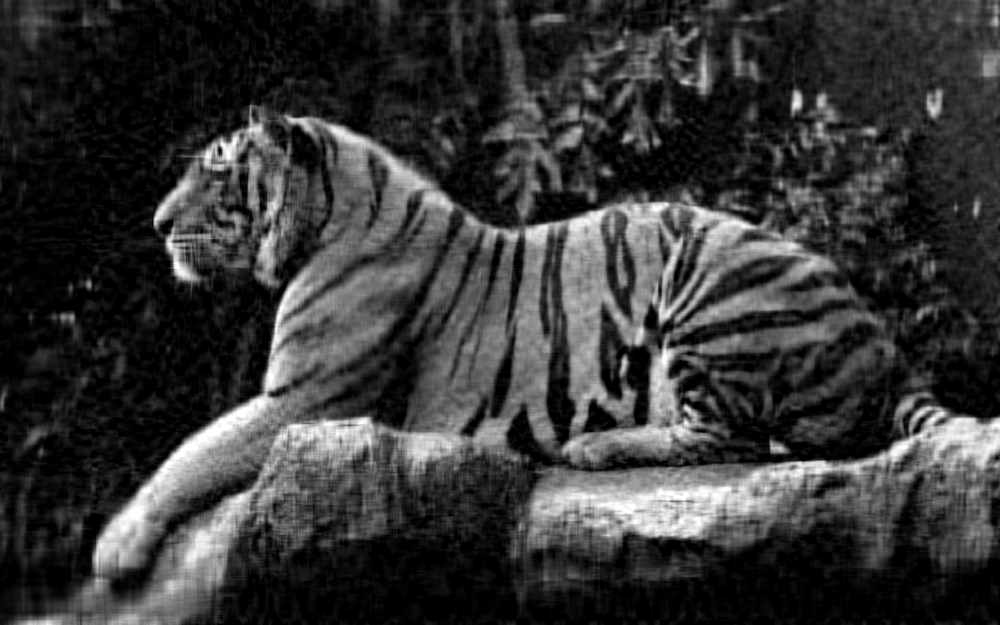

In [20]:
image_50

In [21]:
image_10 = approximate(image, 10, False)

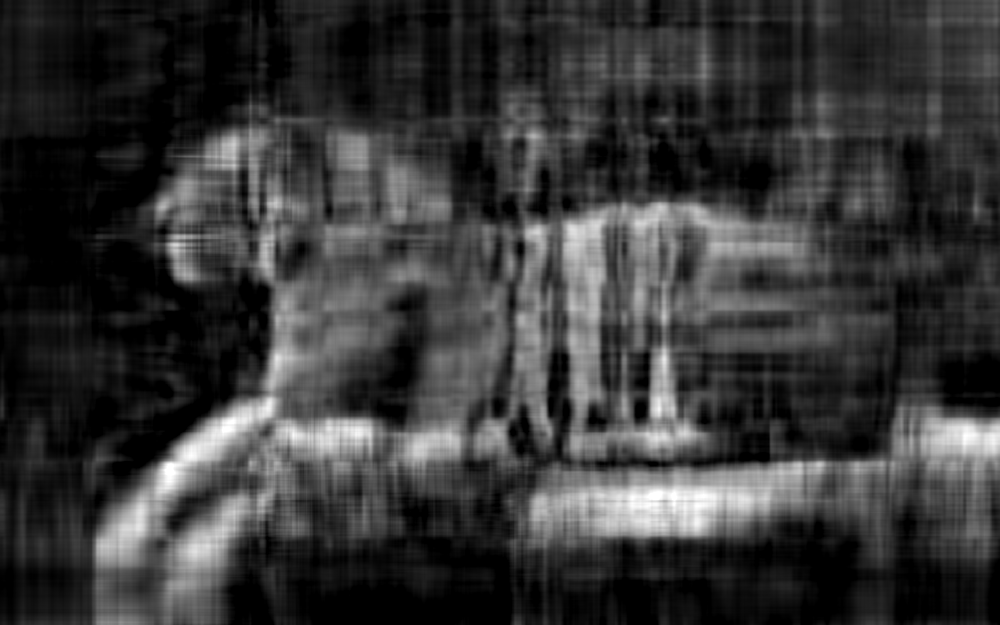

In [22]:
image_10

Možemo primetiti da slike u kojima se zadržava oko 50% sigularnih vrednosti daju pristojan kvalitet. Njihove matrice u dekompoziciji su, takođe, 50% manjih dimenzija pa se može ostvariti i značajno unapređenje računske efikasnosti. 